In [1]:
import module.TorchDataset as td
import platform
import importlib

importlib.reload(td) # 클래스 수정 시 import 리로드

# os에 따라 다르게 적용 (코랩은 리눅스)
current_os = platform.system()
sep = "\\" if current_os == "Windows" else "/" 


# TrainSet
root_train = f"..{sep}01.Data{sep}10.fire{sep}train{sep}" # 루트폴더
extension = "jpg" # 찾을 확장자
img_size = 224

train_dataset = td.TorchDataset(root_train, extension, img_size)


# ValidSet
root_valid = f"..{sep}01.Data{sep}10.fire{sep}valid{sep}" # 루트폴더
extension = "jpg" # 찾을 확장자
img_size = 224

valid_dataset = td.TorchDataset(root_valid, extension, img_size)


# TestSet
root_test = f"..{sep}01.Data{sep}10.fire{sep}test{sep}" # 루트폴더
extension = "jpg" # 찾을 확장자
img_size = 224

test_dataset = td.TorchDataset(root_test, extension, img_size)

In [2]:
train_dataset.get_label_dict()

{'nowildfire': 0, 'wildfire': 1}

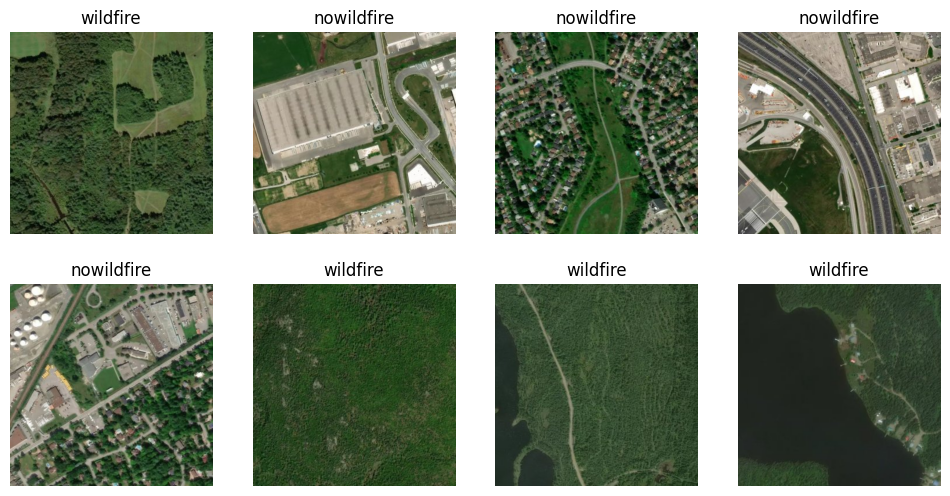

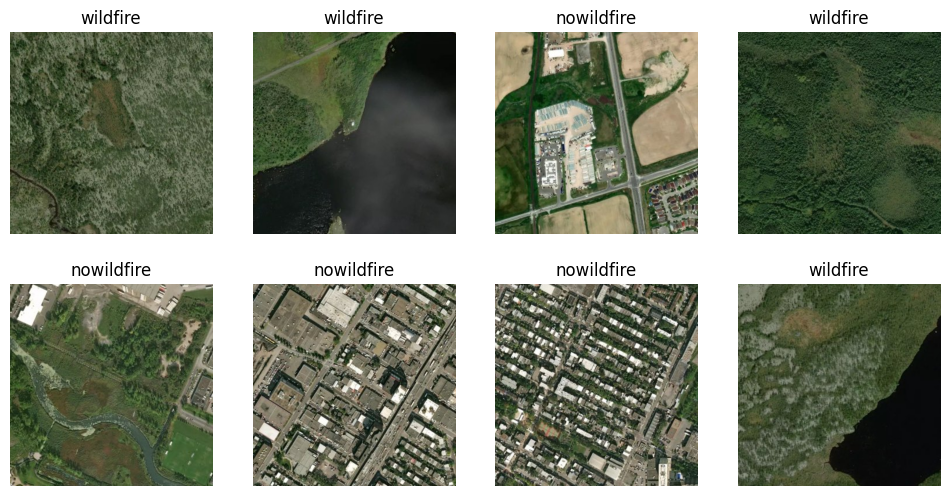

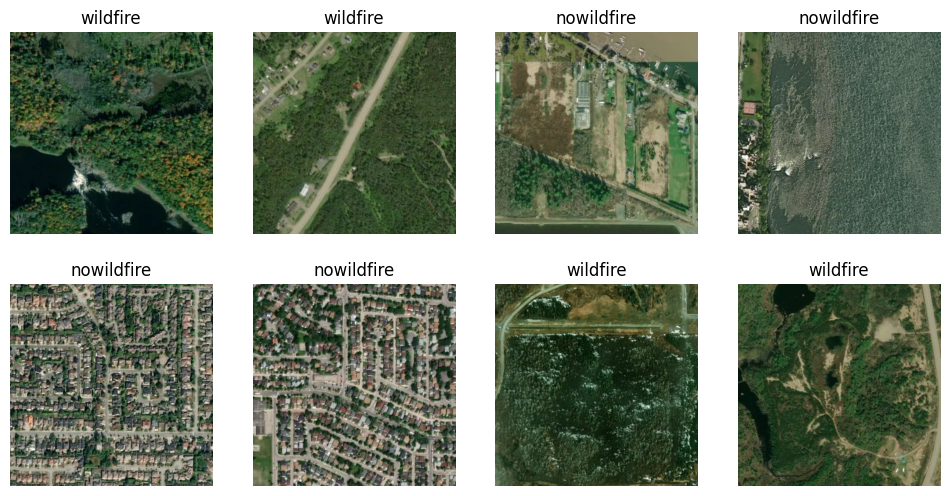

In [3]:
train_dataset.get_sample_image(8, True)
valid_dataset.get_sample_image(8, True)
test_dataset.get_sample_image(8, True)

In [25]:
import module.TorchDatasetCNN as tdCNN
importlib.reload(tdCNN)

cnn_runner = tdCNN.TorchDatasetCNN()

In [26]:
train_dataloader = cnn_runner.get_dataloader(train_dataset, 10, True, True)
valid_dataloader = cnn_runner.get_dataloader(valid_dataset, 10, False, False)
test_dataloader = cnn_runner.get_dataloader(test_dataset, 10, False, False)
len(train_dataloader), len(valid_dataloader), len(test_dataloader)


(3025, 630, 630)

In [ ]:
import module.CNN as CNN

epoch = 20
device = cnn_runner.get_device()
model = CNN.CNN(img_size)
learning_rate = 0.001
save_path = f"save_model{sep}03.Torch_CNN{sep}fire_CNN.pth"

cnn_runner.run_epoch(epoch, train_dataloader, valid_dataloader, device, model, learning_rate, save_path)

In [ ]:
cnn_runner.load(model, save_path)
cnn_runner.test_model(test_dataloader, device, model)